In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os


# EDA

In [15]:
data= pd.read_csv("academic_dataset.csv")

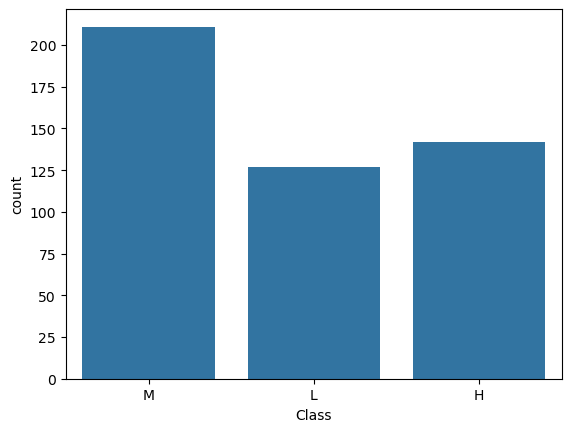

In [25]:
data.Class.value_counts()
sns.countplot(x="Class", data=data)
plt.show()


In [1344]:
class_distribution_percentage = data['Class'].value_counts(normalize=True) * 100
print(class_distribution_percentage)


Class
M    43.958333
H    29.583333
L    26.458333
Name: proportion, dtype: float64


#### An in detail Exploratory Data Analysis through the entire dataset and its variable has been done inorder to understand the dataset which has been attached in a seperate notebook

#### The model has been built in two different ways one taking into account the analysis from the EDA and another by observing the general phenomena of the dataset as the EDA was not required by the assignment

# 1: Model Based on Datasets General Phenomena

## Data Preparation


In [84]:
data = pd.read_csv("academic_dataset.csv")

In [86]:
data.shape

(480, 17)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [90]:
#identify Missing Values
data.isnull().sum() 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## 1:Data Preprocessing

In [92]:
#Encoding categorical variables to numerical
#one-hot-encoding
data = pd.get_dummies(data,dtype=int, columns=['gender','NationalITy','PlaceofBirth','Topic','SectionID','Semester','Relation'])

In [94]:
#Binary Encoding for binary features
data['ParentAnsweringSurvey'] = data['ParentAnsweringSurvey'].map({'Yes': 1, 'No': 0})
data['StudentAbsenceDays'] = data['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})
data['ParentschoolSatisfaction'] = data['ParentschoolSatisfaction'].map({'Good': 1, 'Bad': 0})

In [324]:
#label Encoder
label_encoder = LabelEncoder()
#for ordinal variables
data['StageID'] = label_encoder.fit_transform(data['StageID'])
data['GradeID'] = label_encoder.fit_transform(data['GradeID'])



In [326]:
#scaling/normalization of numerical values 

scaler = MinMaxScaler()

data['raisedhands'] = scaler.fit_transform(data[['raisedhands']])
data['AnnouncementsView'] = scaler.fit_transform(data[['AnnouncementsView']])
data['Discussion'] = scaler.fit_transform(data[['Discussion']])
data['VisITedResources'] = scaler.fit_transform(data[['VisITedResources']])


In [328]:
#label Encoder for class attribute
data['Class'] = label_encoder.fit_transform(data['Class'])

In [329]:
class_col = data.pop('Class')
data['Class'] = class_col

In [332]:
data.head()

,StageID,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,gender_F,...,Topic_Science,Topic_Spanish,SectionID_A,SectionID_B,SectionID_C,Semester_F,Semester_S,Relation_Father,Relation_Mum,Class
0,2,1,0.15,0.161616,0.020408,0.193878,1,1,0,0,...,0,0,1,0,0,1,0,1,0,2
1,2,1,0.20,0.202020,0.030612,0.244898,1,1,0,0,...,0,0,1,0,0,1,0,1,0,2
2,2,1,0.10,0.070707,0.000000,0.295918,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
3,2,1,0.30,0.252525,0.051020,0.346939,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,2,1,0.40,0.505051,0.122449,0.500000,0,0,1,0,...,0,0,1,0,0,1,0,1,0,2


## 1:Model Design

## Split dataset to train, test and validation

In [208]:
# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']



# Split data for train,validation and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [108]:
print(len(X_train), 'training examples')
print(len(X_val), 'validation examples')
print(len(X_test), 'test examples')

384 training examples
48 validation examples
48 test examples


In [110]:
input_dim = X_train.shape[1]
input_dim

58

In [ ]:
# feed forward nueral network with two hidden layer

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(32,activation='relu', input_shape = (input_dim,)),
    #hidden Layer 
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    #output layer
    tf.keras.layers.Dense(3, activation='softmax')
    
])

In [260]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 32)                  │           1,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,403 (28.92 KB)

 Trainable params: 2,467 (9.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,936 (19.29 KB)

In [168]:


tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [312]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 1: Training


In [182]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=5,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3837 - loss: 1.1031 - val_accuracy: 0.5000 - val_loss: 0.9614
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4600 - loss: 0.9493 - val_accuracy: 0.6875 - val_loss: 0.8469
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6141 - loss: 0.8167 - val_accuracy: 0.7083 - val_loss: 0.7468
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.6827 - val_accuracy: 0.6667 - val_loss: 0.6796
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7194 - loss: 0.6420 - val_accuracy: 0.7500 - val_loss: 0.6019
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5638 - val_accuracy: 0.7917 - val_loss: 0.5577
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.5683 - val_accuracy: 0.7708 - val_loss: 0.5450
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.4619 - val_accuracy: 0.8333 - val_loss:

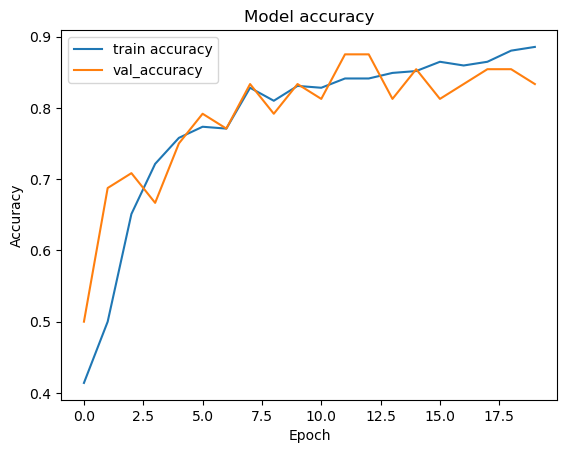

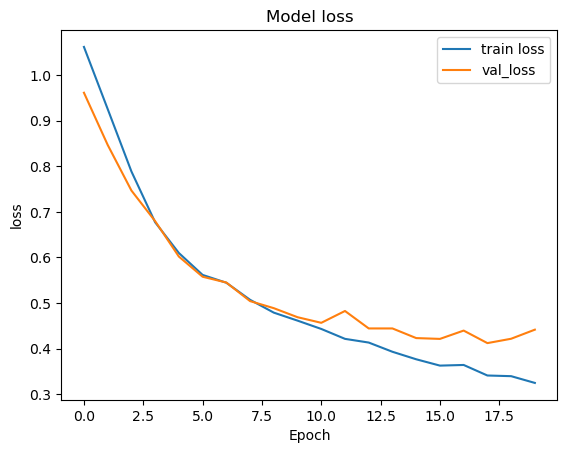

In [188]:
plt.plot(history.history['accuracy'] , label = 'train accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



## 1: Evaluation

In [1697]:
# Assuming you have a trained model and validation data (X_val and y_val)
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7951 - loss: 0.4935 
Test Accuracy: 0.7708333134651184


In [256]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.76      0.93      0.84        14
           2       0.79      0.76      0.78        25

    accuracy                           0.77        48
   macro avg       0.76      0.75      0.75        48
weighted avg       0.77      0.77      0.77        48



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


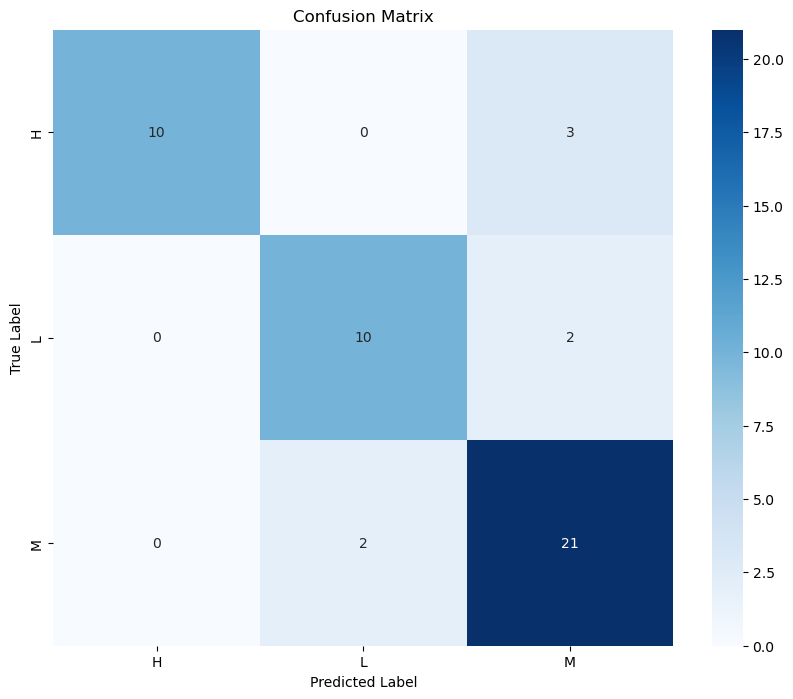

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample predictions and true labels
y_pred = model.predict(X_val)  # Predict on the validation set
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# True labels
y_val = np.array(y_val)  # Ensure y_val is a numpy array

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['H', 'L', 'M'],  # Replace with your class names
            yticklabels=['H', 'L', 'M'])  # Replace with your class names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## 1: Hyperparameter Tuning

In [314]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))  # Adjust output layer for your number of classes

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')),
        loss='sparse_categorical_crossentropy',  # Adjust if you use one-hot encoding
        metrics=['accuracy']
    )
    return model


In [266]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    
)


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [268]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Trial 60 Complete [00h 00m 05s]
val_accuracy: 0.8125

Best val_accuracy So Far: 0.8958333134651184
Total elapsed time: 00h 03m 03s


In [270]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Number of Units: {best_hps.get('units')}")
print(f"Best Dropout Rate: {best_hps.get('dropout')}")


Best Learning Rate: 0.0401384060847505
Best Number of Units: 320
Best Dropout Rate: 0.4


In [316]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.04),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=15,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4525 - loss: 1.0532 - val_accuracy: 0.6458 - val_loss: 0.8116
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6417 - loss: 0.6970 - val_accuracy: 0.7708 - val_loss: 0.5193
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7339 - loss: 0.5826 - val_accuracy: 0.7917 - val_loss: 0.4181
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7720 - loss: 0.5047 - val_accuracy: 0.8125 - val_loss: 0.5751
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7805 - loss: 0.5147 - val_accuracy: 0.7292 - val_loss: 0.6098
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7535 - loss: 0.5355 - val_accuracy: 0.7292 - val_loss: 0.5295


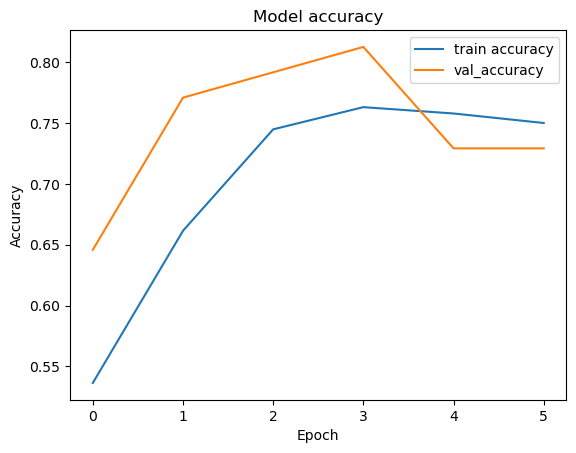

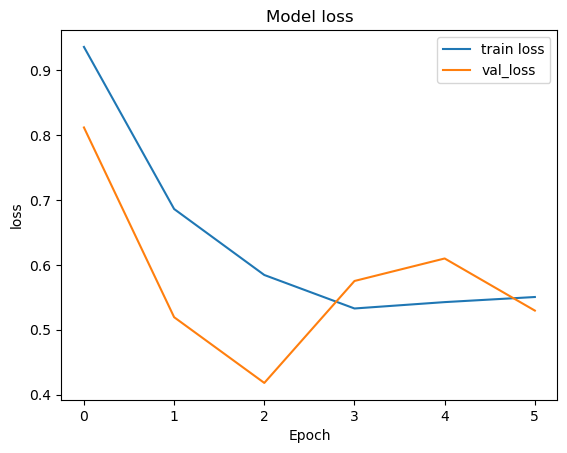

In [318]:
plt.plot(history.history['accuracy'] , label = 'train accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [322]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7778 - loss: 0.4359 
Test Accuracy: 0.7916666865348816


# 2: Model Based on EDA

In [334]:
### included in another file to avoid confusion